### Goal
- Predict that patient has cancer or not based on the input data
- Implement Support Vectore Machines(SVM)

In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [76]:
# Understanding the data
patient_df = pd.read_csv("./datasets/cell_samples.csv")
patient_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [77]:
# print(patient_df.columns)
# print(patient_df["Clump"].unique())
# print(patient_df.info())
# print(patient_df.describe())
print(patient_df.dtypes)

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


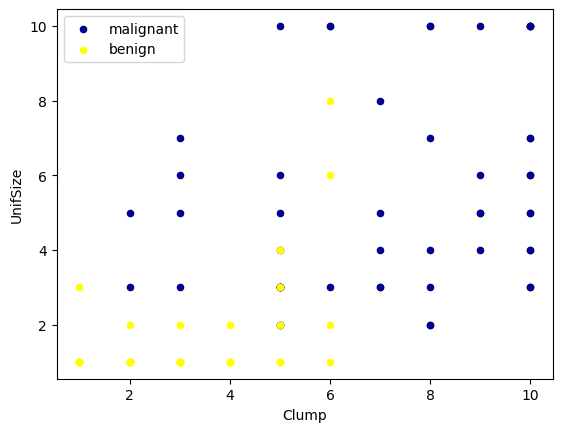

In [78]:
# Plotting the graph
# There are many way to print the smart plots - Interesting
ax = patient_df[patient_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color="DarkBlue", label="malignant")
patient_df[patient_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color="Yellow", label="benign", ax=ax)
plt.show()

In [79]:
# Creating Train and Test data
# patient_df.columns
# y = patient_df[["Class"]].copy()
# x_cleaned = x.loc[x['BareNuc'] != '?'].copy()
# x_cleaned['BareNuc'] = x_cleaned['BareNuc'].astype(int)
# print(x_cleaned["BareNuc"].unique())
# # print(x_cleaned.head())
# # print(y.head())
# print(x_cleaned.info())

# Cleaning the bad data
patient_df = patient_df[pd.to_numeric(patient_df["BareNuc"], errors='coerce').notnull()]
patient_df['BareNuc'] = patient_df['BareNuc'].astype(int)
patient_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [80]:
# Preparing x
feature_df = patient_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asarray(feature_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [81]:
# Preparing y and Removing bad data
patient_df["Class"] = patient_df['Class'].astype(int)
y = np.asarray(patient_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [82]:
# Preparing Train/Test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(f"Training data shape: {x_train.shape}, Testing data shape: {x_test.shape}")
print(f"Training Label shape: {y_train.shape}, Testing label shape: {y_test.shape}")

Training data shape: (546, 9), Testing data shape: (137, 9)
Training Label shape: (546,), Testing label shape: (137,)


In [83]:
# Training and testing the model
from sklearn import svm 
model = svm.SVC(kernel='rbf', gamma='auto')
model.fit(x_train, y_train)

SVC(gamma='auto')

In [84]:
# Making prediction on test data
y_hat = model.predict(x_test)
y_hat[0:5]

array([2, 2, 2, 2, 4])

In [85]:
# Evaluting the model
from sklearn.metrics import classification_report, confusion_matrix
import itertools


              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



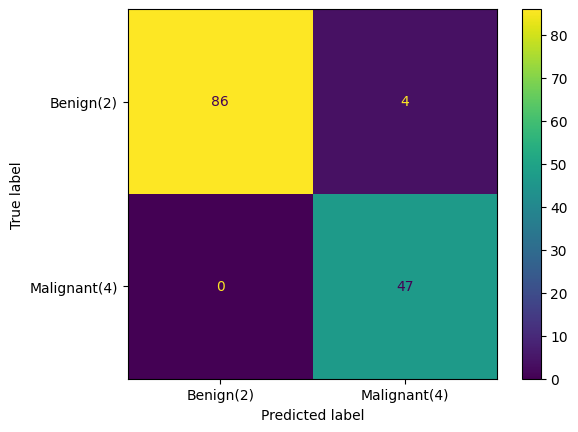

In [86]:
# Computing confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[2, 4])
np.set_printoptions(precision=2)

print(classification_report(y_test, y_hat))

# plot non-normalized confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=["Benign(2)", "Malignant(4)"])
disp.plot()
plt.show()

In [87]:
from sklearn.metrics import f1_score
print(f"y_test : {y_test[0:10]}")
print(f"y_hat  : {y_hat[0:10]}")
f1 = f1_score(y_test, y_hat, average="weighted")
f1

y_test : [2 2 2 2 4 4 2 2 4 4]
y_hat  : [2 2 2 2 4 4 2 2 4 4]


0.9710669934861801

In [89]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_hat, average="weighted")

0.9438958064977816

In [90]:
# summary
# Learned more about cleaning data
# More about plotting
# Train/Test the data
# Prediction of cancer types
# Evaluation of SVM model

In [91]:
print("The End!")

The End!
